In [43]:
import numpy as np
import math
import scipy.linalg as svd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#scikit learning libraries
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans,OPTICS,ward_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector,make_column_transformer, ColumnTransformer

In [6]:
#import the data
#the dataset get from kaggle
df=pd.read_csv('Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df=df.rename(columns={'Annual Income (k$)':'Annaul_income','Spending Score (1-100)':'Spending_score'})
df.set_index('CustomerID')

,Gender,Age,Annaul_income,Spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [12]:
#focusing only on the Anaual income and spendng score
X=df[['Annaul_income','Spending_score']]

<AxesSubplot:xlabel='Annaul_income', ylabel='Spending_score'>

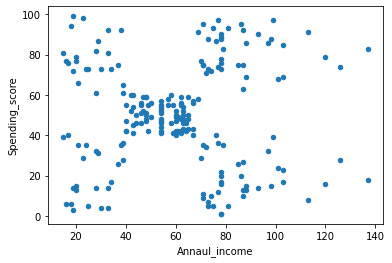

In [13]:
#plot a scatter 
X.plot(kind='scatter',x='Annaul_income',y='Spending_score')

### K means

In [14]:
kmeans=KMeans(n_clusters=5,init='random',random_state=42)

In [15]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5, random_state=42)

In [16]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [17]:
def myscatter(data,assignment):
    sns.scatterplot(data=df,x='Annaul_income',y='Spending_score',
                   hue=assignment,
                   palette=sns.color_palette('Set1',as_cmap=True))

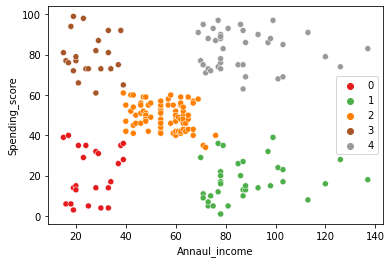

In [18]:
myscatter(X,kmeans.labels_)

### Improved Initailization: k-means++

In [20]:
kmeanspp=KMeans(n_clusters=5,init='k-means++',random_state=42,verbose=1).fit(X)

Initialization complete
Iteration 0, inertia 65910.0
Iteration 1, inertia 45120.13628019223
Iteration 2, inertia 44448.45544793369
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 61257.0
Iteration 1, inertia 45035.42738426894
Iteration 2, inertia 44586.43912798357
Iteration 3, inertia 44448.45544793369
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 52190.0
Iteration 1, inertia 45277.541598720025
Iteration 2, inertia 44509.946167595655
Iteration 3, inertia 44448.45544793369
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 73908.0
Iteration 1, inertia 48472.31774589071
Iteration 2, inertia 44605.750487144025
Iteration 3, inertia 44478.40075665766
Iteration 4, inertia 44454.47647967972
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 78976.0
Iteration 1, inertia 69046.41641333532
Iteration 2, inertia 66929.06315093923
It

In [21]:
kmeanspp.verbose

1

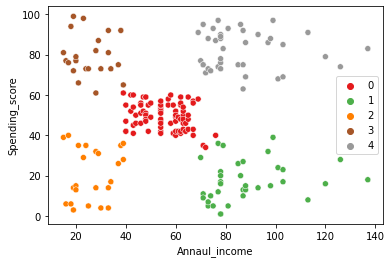

In [22]:
myscatter(X,kmeanspp.labels_)

### DBSCAN

In [29]:
dbscan=DBSCAN(eps=9,min_samples=3).fit(X)

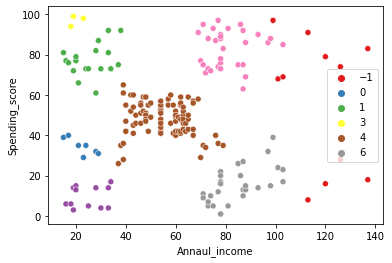

In [30]:
myscatter(X,dbscan.labels_)

### Prediction

In [31]:
xnew=np.array([[30,20],[80,20]])

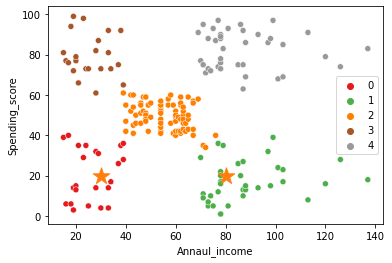

In [33]:
myscatter(X,kmeans.labels_)
plt.scatter(xnew[:,0],xnew[:,1],marker='*',s=300)

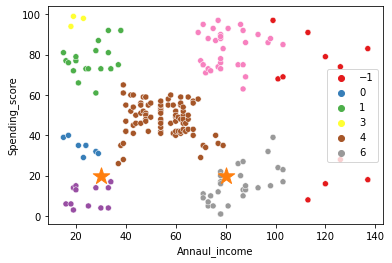

In [35]:
myscatter(X,dbscan.labels_)
plt.scatter(xnew[:,0],xnew[:,1],marker='*',s=300)

In [34]:
#only kmeans can predict this by using a prediction method
kmeans.predict(xnew)

array([0, 1])

In [36]:
#dbscan does not has prediction method
dbscan.predict(xnew)

AttributeError: 'DBSCAN' object has no attribute 'predict'

This one advantage of kmeans over the dbscan method

In [40]:
optics=OPTICS().fit(X)

In [41]:
optics.labels_

array([-1,  5,  8,  5, -1,  5,  8, -1,  8,  5,  8, -1,  8,  5,  8,  5,  0,
        5,  0, -1,  0,  5,  8,  5,  8, -1,  0, -1,  0, -1,  8,  5,  8, -1,
        8, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  2,  2, -1,  2, -1,  2,  2, -1, -1,  2,
       -1, -1,  2, -1,  3, -1,  4,  3,  4,  4, -1,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  3,  3,  4,  3,  3, -1,  4,  3,  3,  3,  4, -1, -1,
       -1, -1, -1, -1, 10, -1,  9, -1, 10, -1,  9,  6,  9, -1,  9,  6, 10,
        6,  9,  6,  9,  6, 10, -1, 10, -1, 10, -1,  9, -1, 10, -1, 10, -1,
        9, -1, 10,  6,  9,  6,  9, -1,  9,  6, 10,  7, -1,  7, 10,  7, -1,
        7, -1,  7, 10,  7, 10,  7, -1,  7, -1, -1, -1,  7, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

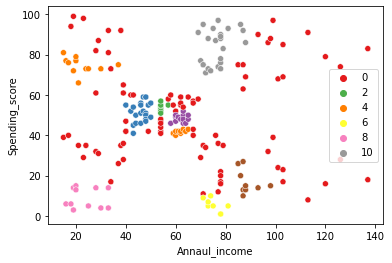

In [42]:
myscatter(X,optics.labels_)

In [61]:
transformer= make_column_transformer((OneHotEncoder(drop='if_binary'),make_column_selector(dtype_include='object')),
                                    remainder=StandardScaler())

In [62]:
pipe=Pipeline(
           steps=[('transformer',transformer),
                  ('model',KMeans(n_clusters=5,init='random',random_state=42))])
pipe.fit(df)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014EFAEAE1F0>)])),
                ('model',
                 KMeans(init='random', n_clusters=5, random_state=42))])

In [63]:
pipe.named_steps['model'].labels_

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4,
       2, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [64]:
pipe=Pipeline(
           steps=[('transformer',transformer),
                  ('model',DBSCAN(eps=10,min_samples=3))])
pipe.fit(df)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014EFAEAE1F0>)])),
                ('model', DBSCAN(eps=10, min_samples=3))])

In [65]:
pipe.named_steps['model'].labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)